# Project Title: Customer Insights & Risk Management at Paisabazaar

## Project Summary

### Project Objective

The goal of this project is to analyze customer and policy data from Paisabazaar to:

- Understand customer behavior and preferences
- Segment customers into meaningful groups for targeted marketing
- Predict customer engagement to improve acquisition and retention
- Identify opportunities for cross-selling and churn reduction

This data-driven approach aims to support strategic decisions in product recommendations, personalized communication, and customer lifecycle management.

---

### Dataset Description

The dataset contains customer-level information related to policy purchases, personal demographics, and financial background. It reflects real-world insurance activity and serves as the foundation for segmentation and predictive modeling tasks.

---

### Feature-wise Explanation

| Feature Name                 | Description |
|-----------------------------|-------------|
| `ID`                        | Unique serial ID of the record |
| `Customer_ID`               | Unique identifier for each customer |
| `Month`                     | Month of the record (used for time-based analysis) |
| `Name`                      | Full name of the customer |
| `Age`                       | Age of the customer |
| `SSN`                       | Social Security Number (anonymized identifier) |
| `Occupation`                | Profession or employment type of the customer |
| `Annual_Income`             | Total yearly income of the customer |
| `Monthly_Inhand_Salary`     | Net monthly salary after deductions |
| `Num_Bank_Accounts`         | Total number of bank accounts held |
| `Num_Credit_Card`           | Number of credit cards owned |
| `Interest_Rate`             | Average interest rate on credit facilities |
| `Num_of_Loan`               | Number of active loans (home, car, personal, etc.) |
| `Type_of_Loan`              | Type(s) of loans the customer has (may be comma-separated) |
| `Delay_from_due_date`       | Average number of days payments are delayed |
| `Num_of_Delayed_Payment`    | Count of times payments were delayed |
| `Changed_Credit_Limit`      | Difference in credit limit compared to previous year |
| `Num_Credit_Inquiries`      | Number of times customer credit was checked |
| `Credit_Mix`                | Composition of different credit types (Good/Standard/Bad) |
| `Outstanding_Debt`          | Total unpaid debt |
| `Credit_Utilization_Ratio` | % of available credit currently used |
| `Credit_History_Age`        | Duration (years/months) of credit history |
| `Payment_of_Min_Amount`     | Whether customer pays minimum amount (Yes/No/Other) |
| `Total_EMI_per_month`       | Sum of all monthly loan installments |
| `Amount_invested_monthly`   | Monthly amount invested by the customer |
| `Payment_Behaviour`         | Pattern of past payments (e.g., 'High_spent_Low_value_payment') |
| `Monthly_Balance`           | Net monthly balance after spending, loans, and investments |
| `Credit_Score`              | Target variable: Overall credit score category (e.g., Good/Standard/Poor) |


---

### Use Cases

1. **Customer Segmentation**: Group customers by financial behavior and demographics for targeted outreach.
2. **Credit Score Prediction**: Build a classification model to predict `Credit_Score`.
3. **Loan Risk Assessment**: Assess loan default risk using payment delays and outstanding debt.
4. **Payment Behavior Profiling**: Analyze and group customers by `Payment_Behaviour` for financial coaching or offers.
5. **Churn Risk Detection**: Identify customers at risk of default or low engagement.
6. **Cross-Selling Opportunity**: Recommend relevant financial products using loan and investment patterns.
7. **Occupation-Based Analysis**: Identify how different professions manage finances.
8. **Investment Strategy Insights**: Understand monthly investment habits for wealth product promotion.
9. **Credit Utilization Monitoring**: Track over-utilization risks via `Credit_Utilization_Ratio`.
10. **Delinquency Prediction**: Predict likelihood of payment delays based on past data.



## GitHub Link -
https://github.com/AkashBommidi27/Paisabazaar-Customer-Insights-ML

## Data Overview

### Suppress Warnings

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load the Dataset

In [3]:
# Download and load Paisabazaar dataset from Google Drive

# Install gdown
!pip install -q gdown

# Import required libraries
import gdown
import pandas as pd

# Google Drive file ID and download URL
file_id = "1tpaMVcgegVvm5_zJUyWnct3DlG7EtDo7"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "paisabazaar_dataset.csv"
gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1tpaMVcgegVvm5_zJUyWnct3DlG7EtDo7
To: /content/paisabazaar_dataset.csv
100%|██████████| 30.8M/30.8M [00:00<00:00, 52.4MB/s]


### View top rows

In [4]:
# Preview top rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Rows and Columns Count

In [ ]:
# Print total rows and features in the dataset
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 100000
Total Columns: 28


### Dataset information

In [ ]:
# Display summary of DataFrame including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

### Statistical Description

In [ ]:
# Generate descriptive statistics for all numeric columns
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Drop Duplicates

In [ ]:
# Print the number of duplicated rows in the DataFrame
print(df.duplicated().sum())

0


### Missing Values Count

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


### Column names

In [ ]:
# Display the list of all column names in the DataFrame
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### No. of Unique Values per feature

In [ ]:
# Show the number of unique values in each column
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


In [ ]:
# Drop 'ID', 'Name', 'SSN' columns in-place
df.drop(['ID', 'Name', 'SSN'], axis=1, inplace=True)

### Data Types

In [ ]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
Customer_ID,int64
Month,int64
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,float64
Interest_Rate,float64
Num_of_Loan,float64


### Split `Type_of_Loan` feature

In [ ]:
# Clean each loan type by stripping and removing connectors like "and"
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and ', ' ', regex=False)

# Replace "Not specified" with "No_data" in Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('Not Specified', 'No Data', regex=False)


# Fill NaNs with empty string to avoid split errors
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')

# Split the loan types and explode all unique loan types
all_loan_types = set()
df['Type_of_Loan'].str.split(',').apply(lambda x: [all_loan_types.add(i.strip()) for i in x])

# Create binary columns for each loan type
for loan in all_loan_types:
    loan_clean = loan.strip()
    df[f'Loan_{loan_clean}'] = df['Type_of_Loan'].apply(lambda x: int(loan_clean in x))

# Drop the original column if needed
df.drop('Type_of_Loan', axis=1, inplace=True)

In [ ]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Loan_Debt Consolidation Loan,Loan_Credit-Builder Loan,Loan_No Data,Loan_Mortgage Loan,Loan_Payday Loan,Loan_Auto Loan,Loan_Student Loan,Loan_Personal Loan,Loan_Home Equity Loan
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,0,1,0,0,0,1,0,1,1
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,0,1,0,0,0,1,0,1,1
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,0,1,0,0,0,1,0,1,1
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,0,1,0,0,0,1,0,1,1
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,0,1,0,0,0,1,0,1,1


In [ ]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Loan_Debt Consolidation Loan',
       'Loan_Credit-Builder Loan', 'Loan_No Data', 'Loan_Mortgage Loan',
       'Loan_Payday Loan', 'Loan_Auto Loan', 'Loan_Student Loan',
       'Loan_Personal Loan', 'Loan_Home Equity Loan'],
      dtype='object')

## Data Visualization

### Distribution of Age


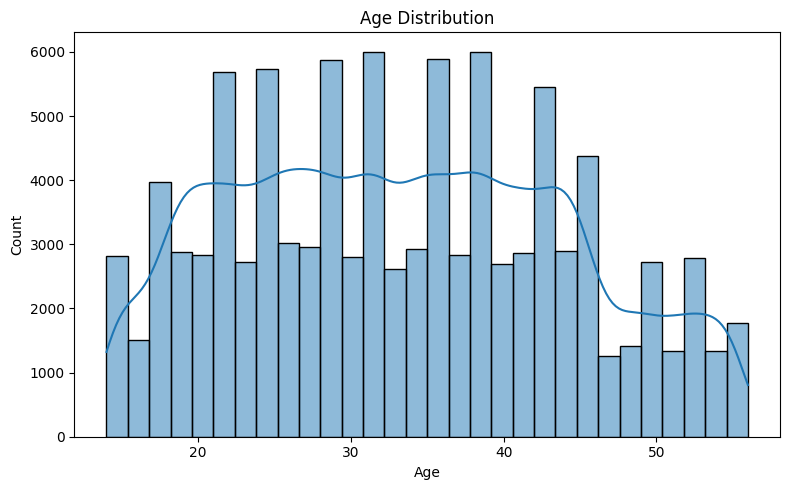

In [ ]:
# Plot histogram of 'Age' with KDE, 30 bins
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The "Age Distribution" histogram shows a multimodal pattern with peaks around 20-30 and 40-50 years, and a decline after 50, based on a count scale up to 6000.

### Distribution of Credit Utilization Ratio


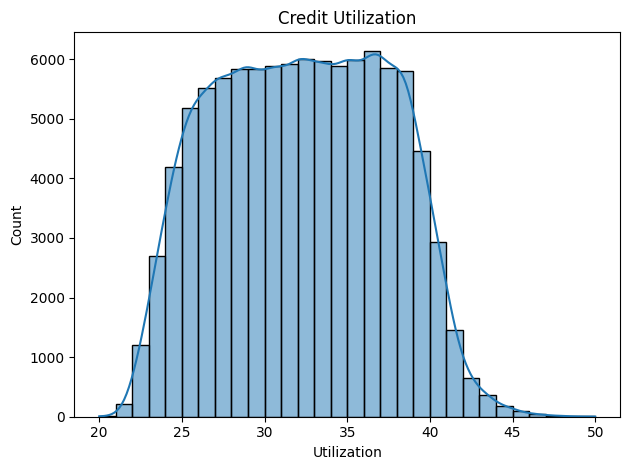

In [ ]:
# Plot Credit Utilization Ratio distribution with fewer visual elements
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True)
plt.title('Credit Utilization')
plt.xlabel('Utilization')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The "Credit Utilization" histogram shows a unimodal distribution peaking around 35-40, with counts reaching approximately 6000. Values taper off below 25 and above 45, indicating fewer instances at the extremes.

### Changed Credit Limit Distribution

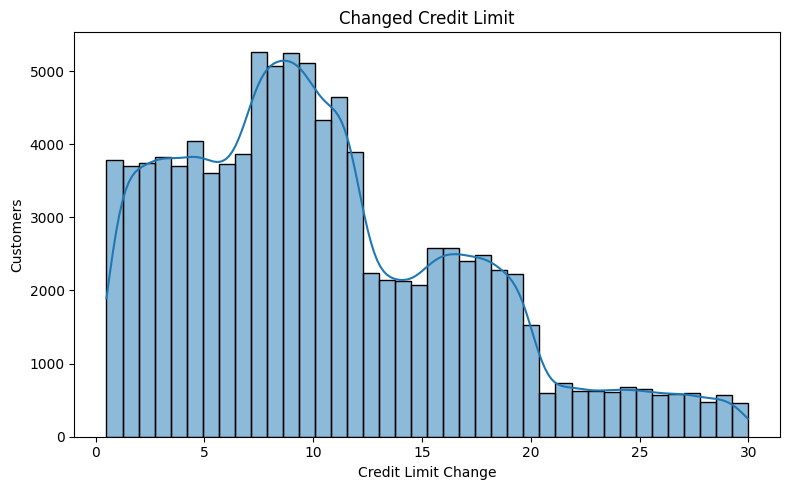

In [ ]:
# Plot distribution of Changed Credit Limit with histogram and KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Changed_Credit_Limit'], bins=40, kde=True)
plt.title('Changed Credit Limit')
plt.xlabel('Credit Limit Change')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

The "Changed Credit Limit" histogram shows a multimodal distribution with peaks around 5-10 and 15-20, with counts up to 5000 customers. Values decline sharply after 20, with minimal instances beyond 25.

### Distribution of Credit History Age

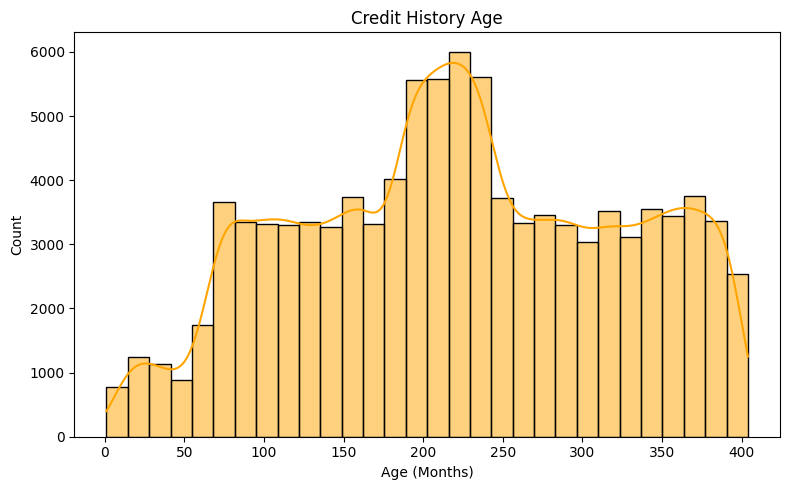

In [ ]:
# Plot the distribution of Credit History Age with histogram and KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(df['Credit_History_Age'], bins=30, kde=True, color='orange')
plt.title('Credit History Age')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The "Credit History Age" histogram shows a unimodal distribution peaking around 200-250 months, with counts reaching approximately 6000. Values are lower below 100 and taper off after 300 months.

### Count of Each Credit Score Category


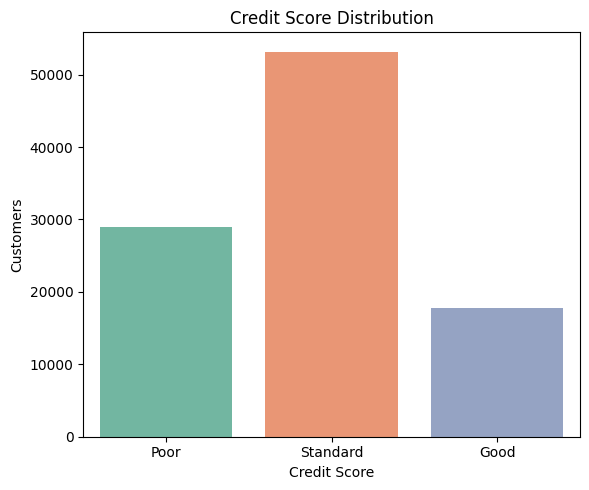

In [ ]:
# Plot the count of customers in each Credit Score category
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Credit_Score', order=['Poor', 'Standard', 'Good'], palette='Set2')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

The "Credit Score Distribution" bar chart shows the number of customers by credit score category. The "Standard" category has the highest count (around 5000), followed by "Poor" (around 3000), and "Good" (around 2000).

### Distribution of Annual Income


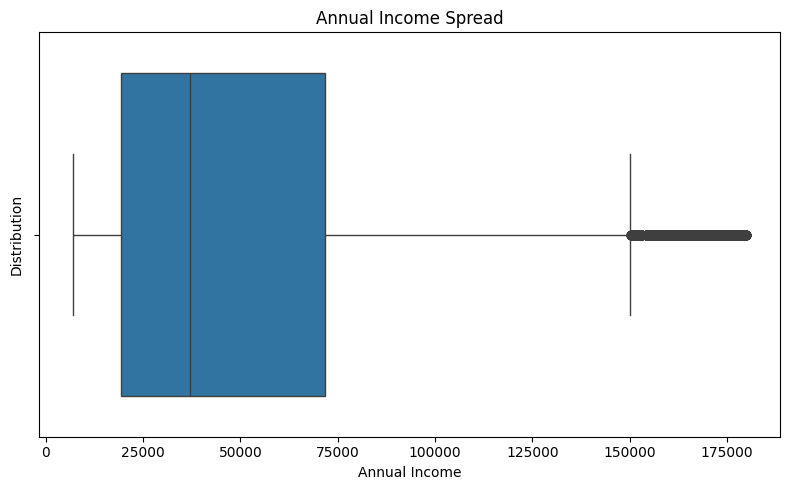

In [ ]:
# Plot the spread of Annual Income using a boxplot to show outliers and distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Annual_Income')
plt.title('Annual Income Spread')
plt.xlabel('Annual Income')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

The "Annual Income Spread" box plot shows a distribution heavily skewed toward lower incomes, with most values concentrated around 25,000-75,000. A few outliers extend to approximately 175,000.

### Count of Occupations


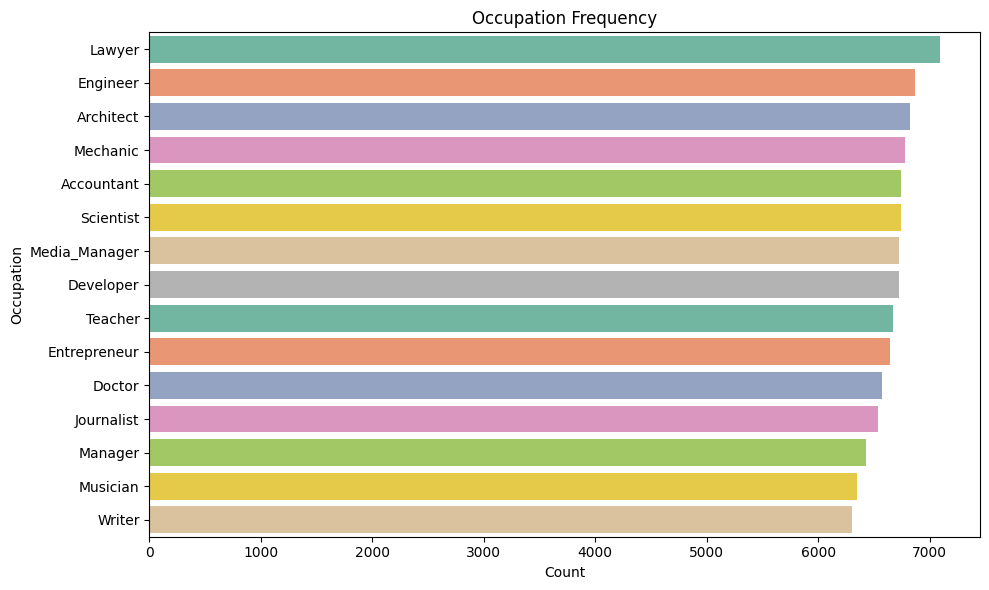

In [ ]:
# Plot the frequency of each Occupation using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='Set2')
plt.title('Occupation Frequency')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

The "Occupation Frequency" bar chart shows the distribution of occupations, with counts ranging up to 7000. All listed occupations (Lawyer, Engineer, Architect, etc.) have similar high frequencies, clustering around 6000-7000 counts.

### Age vs Credit Score


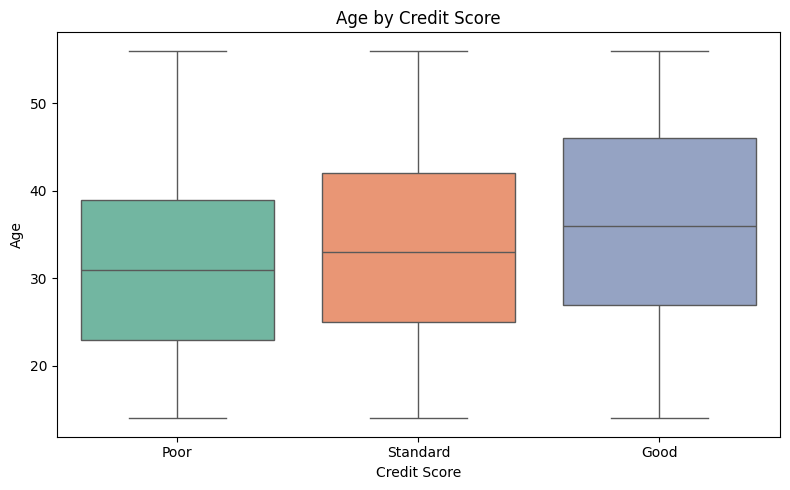

In [ ]:
# Compare Age distribution across Credit Score categories using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Age', data=df, order=['Poor', 'Standard', 'Good'], palette='Set2')
plt.title('Age by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

The "Age by Credit Score" box plot shows age distribution across credit score categories. "Poor" and "Standard" range from about 20-40, while "Good" extends to 50, with medians around 35-40 across all categories.

### Credit Mix vs Credit Score


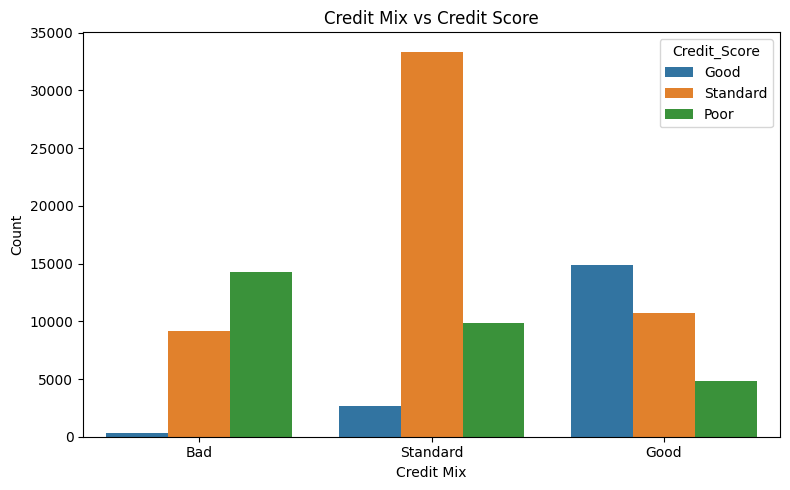

In [ ]:
# Plot the distribution of Credit Score across different Credit Mix types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Credit_Mix', hue='Credit_Score', order=['Bad', 'Standard', 'Good'])
plt.title('Credit Mix vs Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The "Credit Mix vs Credit Score" bar chart shows the count of credit scores across credit mix categories. "Standard" mix has the highest count (around 3000-3500) for "Standard" scores. "Bad" mix has moderate counts for "Poor" (around 1500) and "Standard" (around 1000), with almost no "Good" scores. "Good" mix shows higher "Good" scores (around 1500) and moderate "Standard" (around 1000) and "Poor" (around 500) scores.

### Count of Credit Mix categories


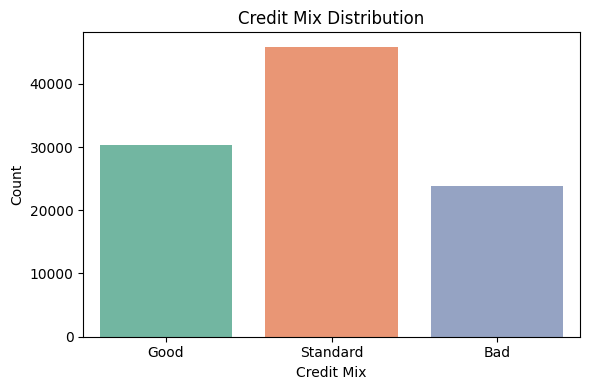

In [ ]:
# Plot the distribution of each Credit Mix category
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit_Mix', palette='Set2')
plt.title('Credit Mix Distribution')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The "Credit Mix Distribution" bar chart shows the count of credit mix categories. "Standard" has the highest count (around 4000), followed by "Good" (around 3000), and "Bad" (around 2500).

### Monthly Balance vs Credit Score


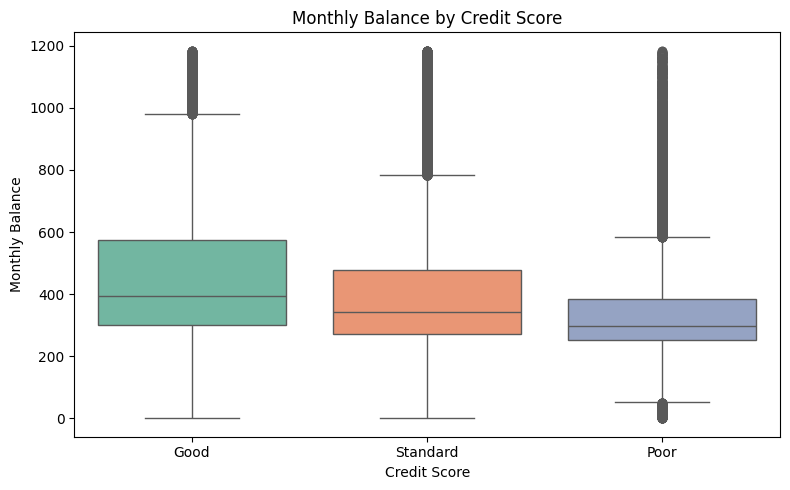

In [ ]:
# Compare Monthly Balance across different Credit Score categories using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Credit_Score', y='Monthly_Balance', palette='Set2')
plt.title('Monthly Balance by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Balance')
plt.tight_layout()
plt.show()

- **Good Credit Score**: Median ~500, range ~200-800, outliers to 1200.
- **Standard Credit Score**: Median ~500, range ~300-700, outliers to 1200.
- **Poor Credit Score**: Median ~400, range ~200-600, outliers to 1200.
- **Observation**: Similar medians for Good and Standard, lower for Poor, all with high outliers.

### Credit Utilization Ratio vs Credit Score

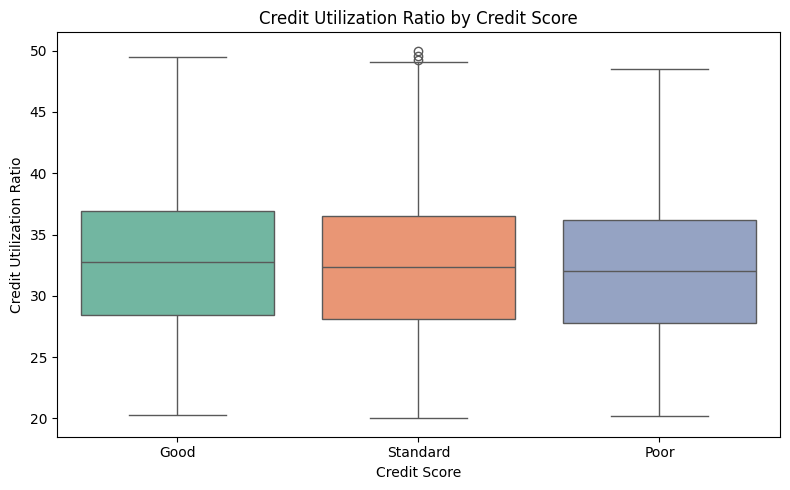

In [ ]:
# Compare Credit Utilization Ratio across Credit Score categories using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Credit_Score', y='Credit_Utilization_Ratio', palette='Set2')
plt.title('Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.tight_layout()
plt.show()

- **Good Credit Score**: Median ~32, range 28-38, no significant outliers.
- **Standard Credit Score**: Median ~32, range 28-38, with a slight extension to 50 indicating a minor outlier.
- **Poor Credit Score**: Median ~32, range 28-38, no significant outliers.
- **Observation**: All categories share a similar median (~32), with Standard credit score showing slightly higher variability (up to 50), while Good and Poor remain consistent within 28-38.

### Num_of_Loan vs Credit Score


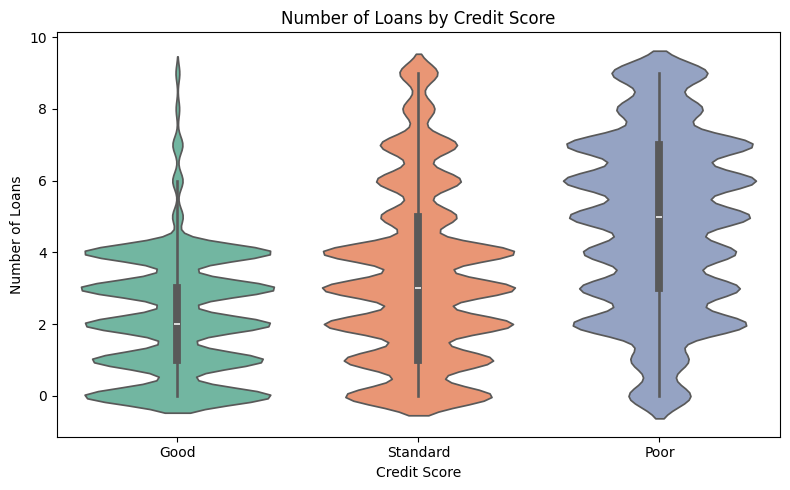

In [ ]:
# Visualize the distribution and density of Number of Loans across Credit Score categories using a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Credit_Score', y='Num_of_Loan', palette='Set2')
plt.title('Number of Loans by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Loans')
plt.tight_layout()
plt.show()

- **Good Credit Score**: Median ~2, range 0-10, multiple peaks suggesting varied loan distribution.
- **Standard Credit Score**: Median ~3, range 0-10, with more pronounced peaks indicating higher variability.
- **Poor Credit Score**: Median ~5, range 0-10, shows a broader spread with several peaks.
- **Observation**: All categories have a similar median (~4) and range (0-10), but Standard and Poor exhibit greater variability and multiple modes compared to Good.

### Average EMI vs Occupation by Credit Score


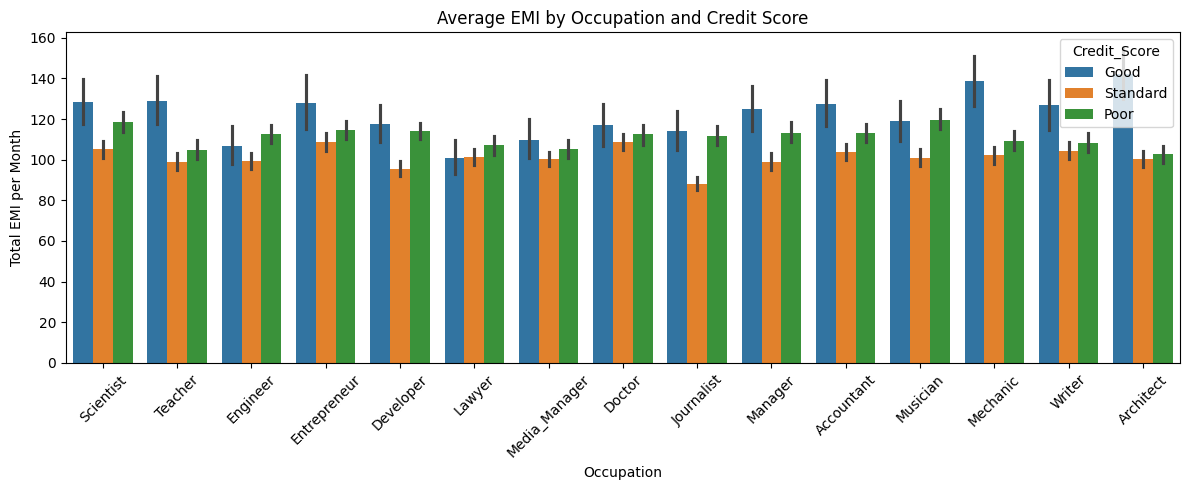

In [ ]:
# Plot average EMI amount across different occupations and credit scores using a grouped bar chart
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Occupation', y='Total_EMI_per_month', hue='Credit_Score')
plt.title('Average EMI by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Total EMI per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- **Good Credit Score**: Highest EMI across most occupations (e.g., Scientist ~130, Architect ~140), consistently above Standard and Poor.
- **Standard Credit Score**: Moderate EMI (e.g., Scientist ~100, Architect ~120), generally lower than Good, higher than Poor.
- **Poor Credit Score**: Lowest EMI (e.g., Scientist ~110, Architect ~130), with some overlap with Standard and occasional peaks.
- **Observation**: Good credit score consistently shows the highest EMI, Standard is intermediate, and Poor varies but is generally lower, with notable exceptions like Architect.

### Heatmap of Loan Types Correlated with Credit Score

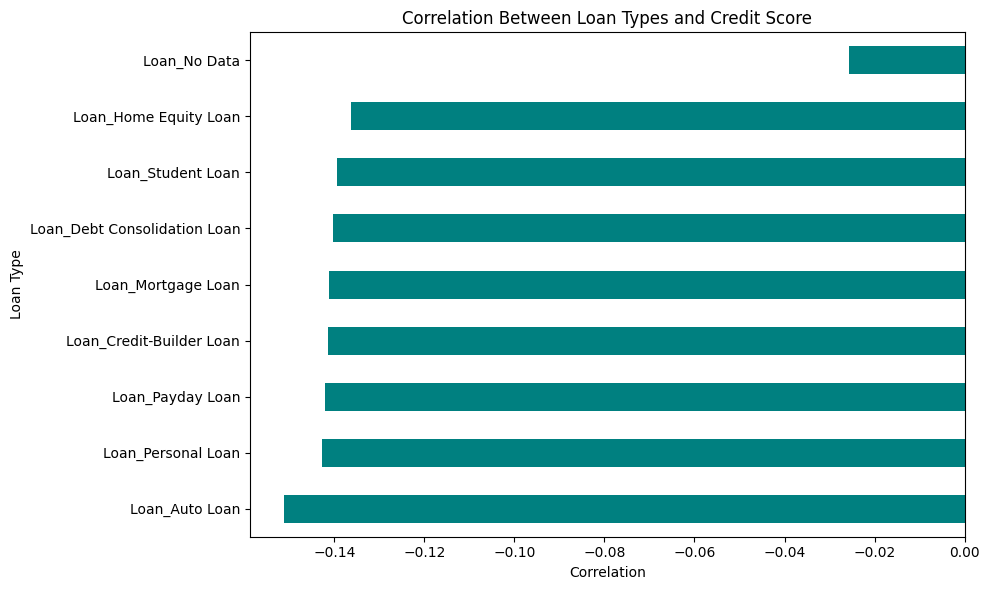

In [ ]:
# 1. Select loan type columns
loan_cols = [col for col in df.columns if col.startswith('Loan_')]

# 2. Create a copy and encode Credit_Score numerically
loan_score_corr = df[loan_cols].copy()
loan_score_corr['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

# 3. Compute correlation of each loan type with Credit_Score only
correlations = loan_score_corr.corr()['Credit_Score'].drop('Credit_Score')

# 4. Plot as bar chart
plt.figure(figsize=(10,6))
correlations.sort_values().plot(kind='barh', color='teal')
plt.title('Correlation Between Loan Types and Credit Score')
plt.xlabel('Correlation')
plt.ylabel('Loan Type')
plt.tight_layout()
plt.show()

All loan types (e.g., Home Equity, Student, Mortgage) show a weak negative correlation (~-0.02) with credit score, except Loan_No Data (~0), indicating minimal influence.

### Occupation vs Average Outstanding Debt

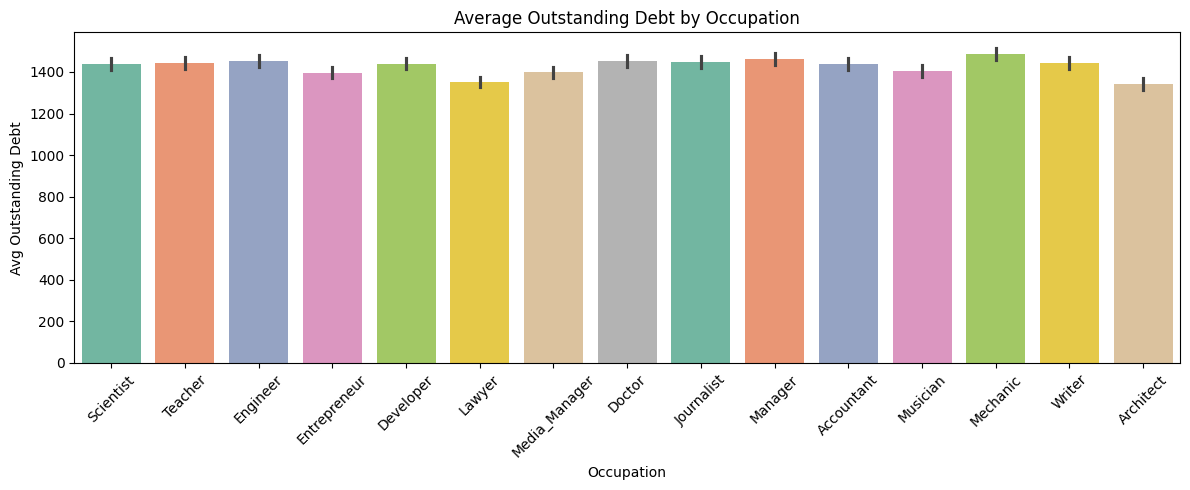

In [ ]:
# Plot average outstanding debt for each occupation using a bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Occupation', y='Outstanding_Debt', estimator='mean', palette='Set2')
plt.title('Average Outstanding Debt by Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Occupation')
plt.ylabel('Avg Outstanding Debt')
plt.tight_layout()
plt.show()

The plot shows the average outstanding debt by occupation, with most occupations like Scientist, Teacher, Engineer, Entrepreneur, Developer, Doctor, Journalist, Manager, Accountant, Musician, and Mechanic averaging around 1400. Lawyer, Media Manager, Writer, and Architect have slightly lower averages of about 1300. Overall, debt levels are consistently high across all occupations with minor variations.

### Heatmap of All Financial Features

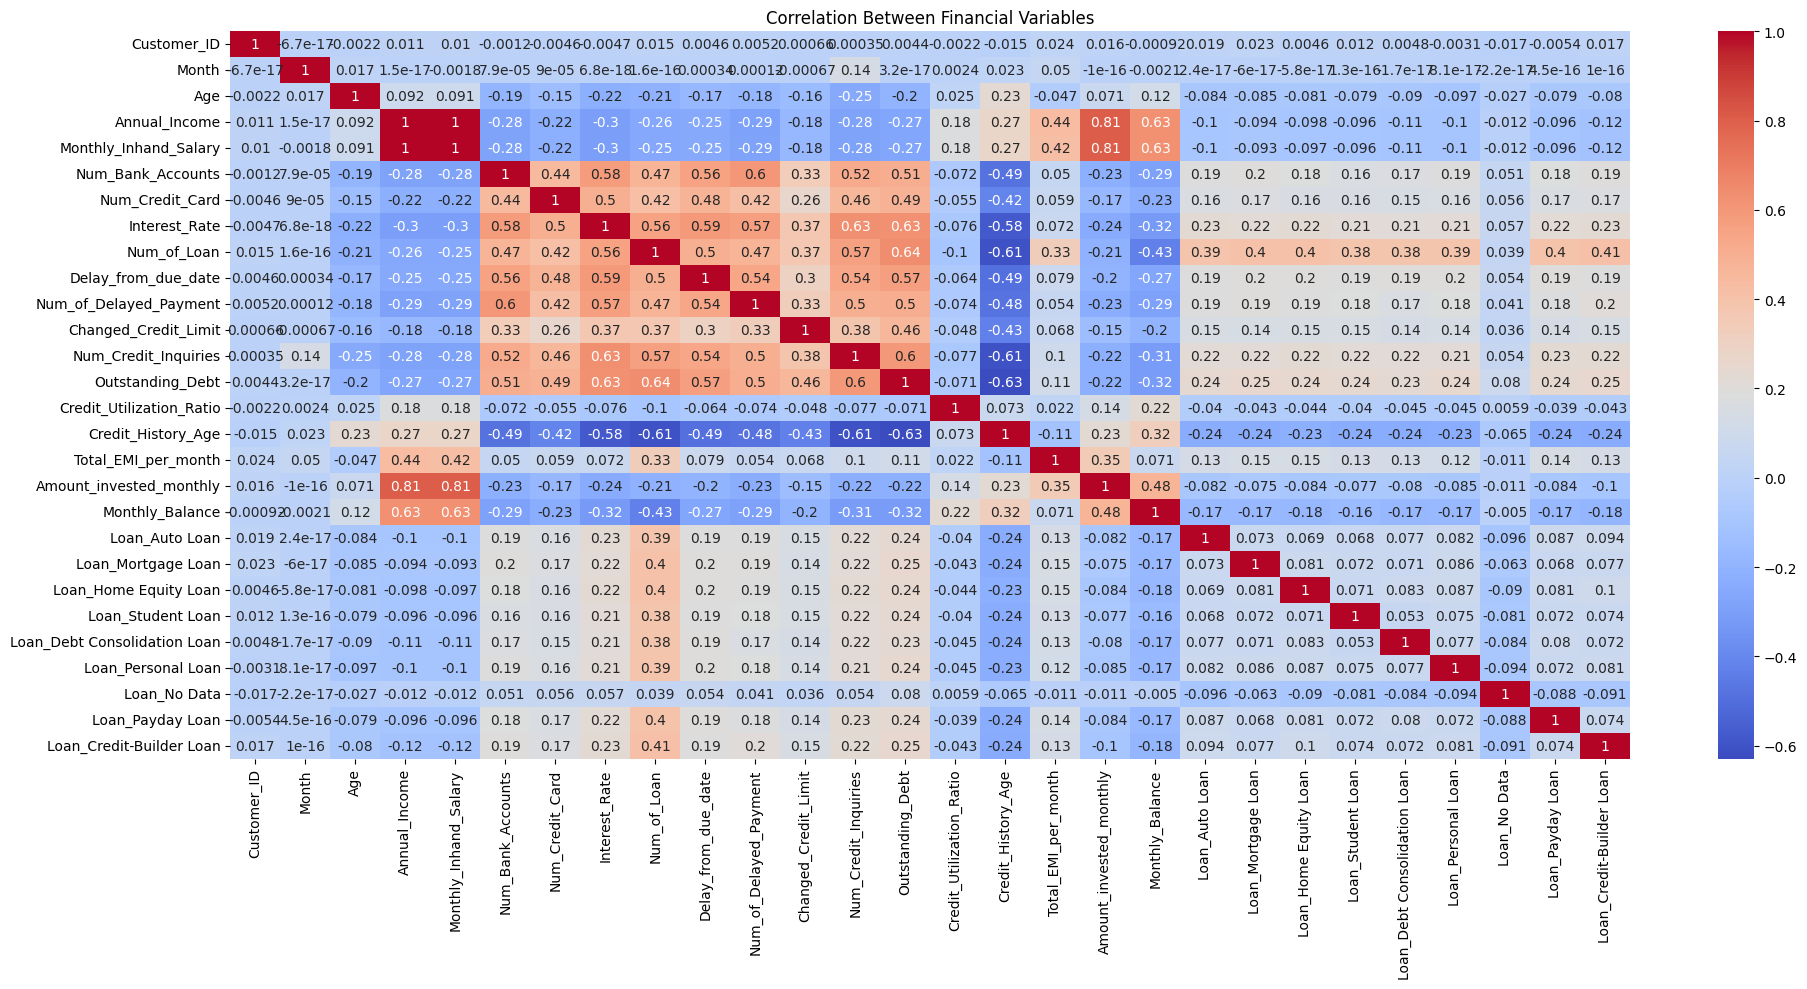

In [ ]:
# Plot a heatmap showing correlations between all numeric features in the dataset
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Between Financial Variables')
plt.tight_layout()
plt.show()

- **Strong Positive:** `Monthly_Income` & `Annual_Income` (0.99), `Num_of_Loan` & `Delay_from_due_date` (0.56), `Credit_Utilization_Ratio` & `Outstanding_Debt` (0.71).
- **Strong Negative:** `Age` & `Loan_Auto_Loan` (-0.24), `Monthly_Balance` & `Credit_Utilization_Ratio` (-0.35), `Num_Credit_Inquiries` & `Loan_Payday_Loan` (-0.24).
- **Moderate:** `Interest_Rate` & `Num_of_Loan` (0.37), `Changed_Credit_Limit` & `Credit_Utilization_Ratio` (0.33).
- **Insight:** Income variables are highly correlated; loan types vary with age and inquiries; high debt and utilization linkage.

### Credit Score Distribution per Occupation

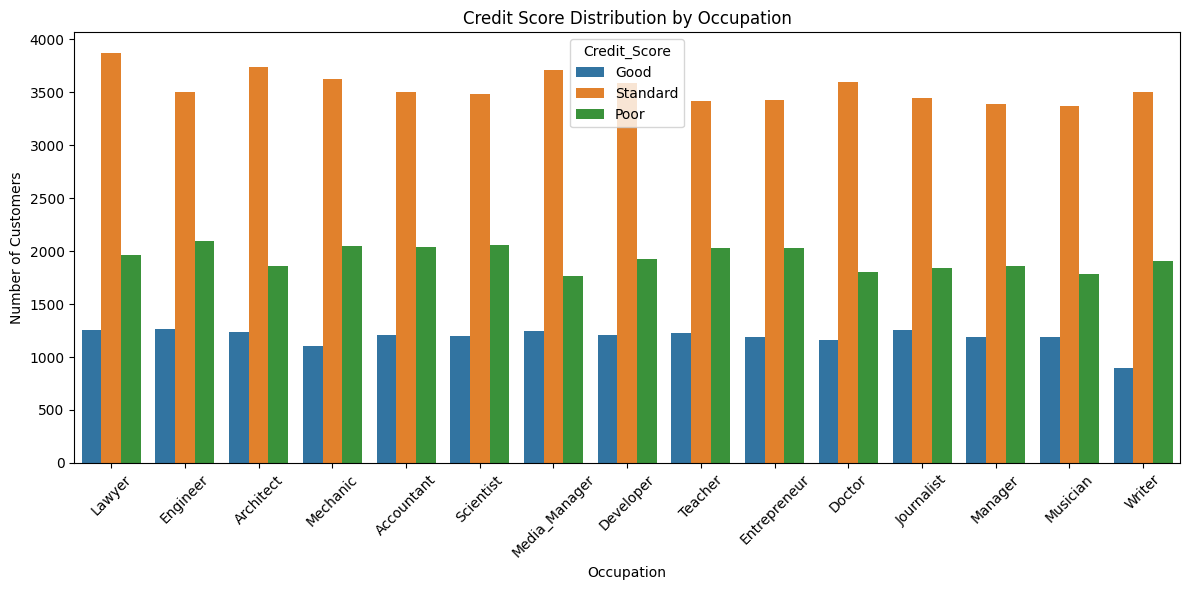

In [ ]:
# Plot the distribution of Credit Score categories for each Occupation using a grouped count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', hue='Credit_Score', order=df['Occupation'].value_counts().index)
plt.title('Credit Score Distribution by Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

- **Highest Standard Scores:** Lawyers, Engineers, Architects (~3500-4000 customers).
- **Good Scores:** Consistent across occupations (~1000-1500 customers), highest for Lawyers and Engineers.
- **Poor Scores:** Highest for Managers and Media Managers ( 2000 customers), lowest for Writers (~1500).
- **Insight:** Standard scores dominate, with Managers and Media Managers showing higher poor scores, while Lawyers and Engineers lead in good scores.

### Delayed Payments vs Credit Score

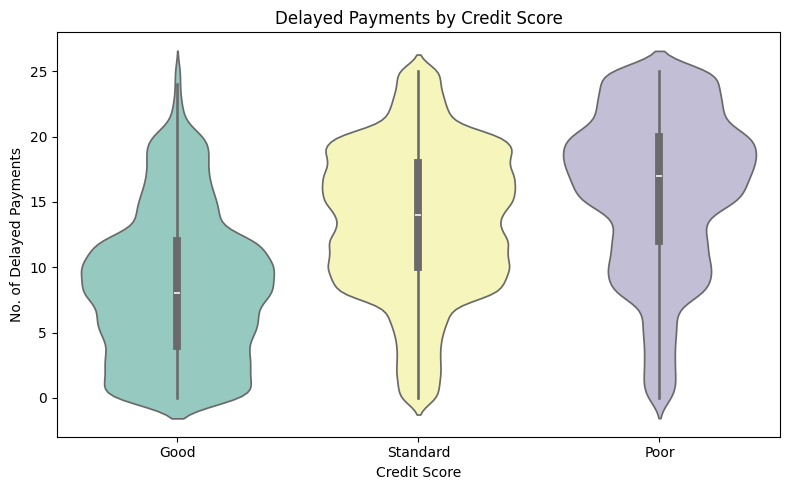

In [ ]:
# Visualize the distribution and density of delayed payments across Credit Score categories using a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Credit_Score', y='Num_of_Delayed_Payment', palette='Set3')
plt.title('Delayed Payments by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('No. of Delayed Payments')
plt.tight_layout()
plt.show()

- **Good Credit Score:** Narrow distribution, centered around 5-10 delayed payments, with few exceeding 10.
- **Standard Credit Score:** Wider distribution, centered around 10-15, with a significant spread up to 15-20 delayed payments.
- **Poor Credit Score:** Broadest distribution, centered around 15-20, with some instances reaching 20+ delayed payments.
- **Insight:** Poor credit scores correlate with higher and more variable delayed payments, while good scores show the least delays.

### Loan Count per Type

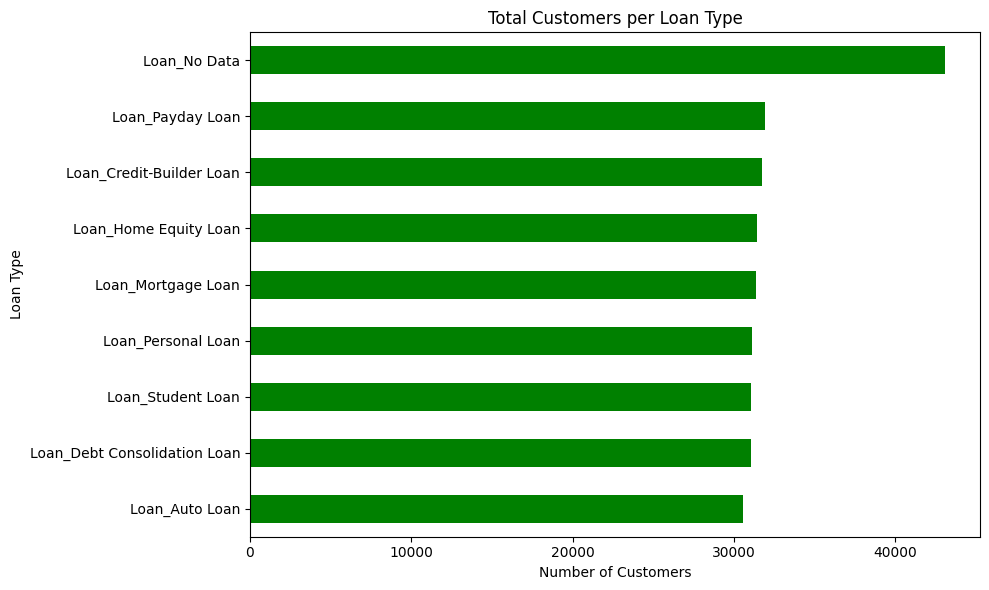

In [ ]:
# Plot total number of customers having each loan type using a horizontal bar chart
loan_cols = [col for col in df.columns if col.startswith('Loan_')]  # Identify loan type columns
loan_totals = df[loan_cols].sum().sort_values()  # Sum loan flags to count customers per type

plt.figure(figsize=(10, 6))
loan_totals.plot(kind='barh', color='green')  # Horizontal bar plot
plt.title('Total Customers per Loan Type')
plt.xlabel('Number of Customers')
plt.ylabel('Loan Type')
plt.tight_layout()
plt.show()

- **Highest:** Loan_No Data (~4000 customers), significantly more than others.
- **Similar Distribution:** Payday Loan, Credit-Builder Loan, Home Equity Loan, Mortgage Loan, Personal Loan, Debt Consolidation Loan, Student Loan, Auto Loan (~2500-3000 customers each).
- **Insight:** A large portion of customers have no loan data, while other loan types are evenly distributed with moderate customer numbers.

### Pairplot for Core Financial Metrics by Credit Score

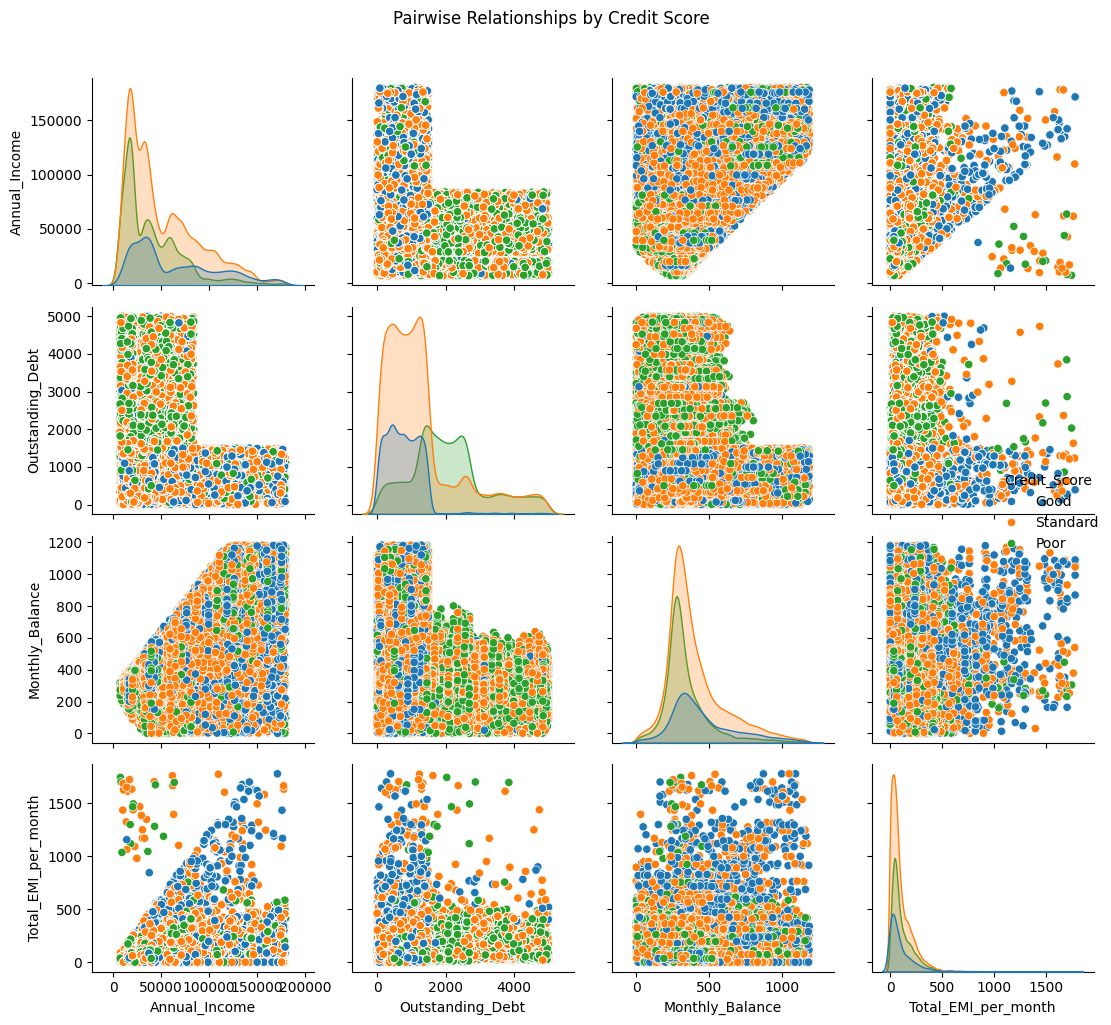

In [ ]:
# Plot pairwise relationships between selected numeric features, colored by Credit Score
sns.pairplot(df, vars=[
    'Annual_Income', 'Outstanding_Debt',
    'Monthly_Balance', 'Total_EMI_per_month'
], hue='Credit_Score')  # Use Credit Score for color coding

plt.suptitle('Pairwise Relationships by Credit Score', y=1.02)  # Add title above the grid
plt.tight_layout()
plt.show()

Good credit scores correlate with higher income and balances, lower debt; Poor scores show higher debt and lower financial metrics.

### Number of Credit Inquiries vs Credit Score

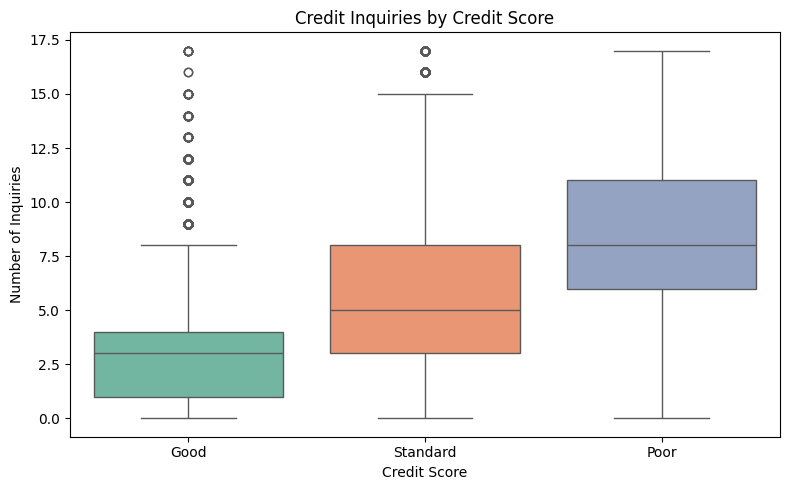

In [ ]:
# Boxplot showing the distribution of credit inquiries across different credit score categories
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Credit_Score', y='Num_Credit_Inquiries', palette='Set2')
plt.title('Credit Inquiries by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Inquiries')
plt.tight_layout()
plt.show()


- **Good Credit Score:** Green, narrow range ~2.5-5, few outliers up to 15.
- **Standard Credit Score:** Orange, wider range ~2.5-7.5, outliers up to 15.
- **Poor Credit Score:** Blue, broadest range ~7.5-12.5, outliers up to 17.5.
- **Insight:** Poor scores have the highest and most variable inquiries; good scores show the least.

### Investment vs Outstanding Debt

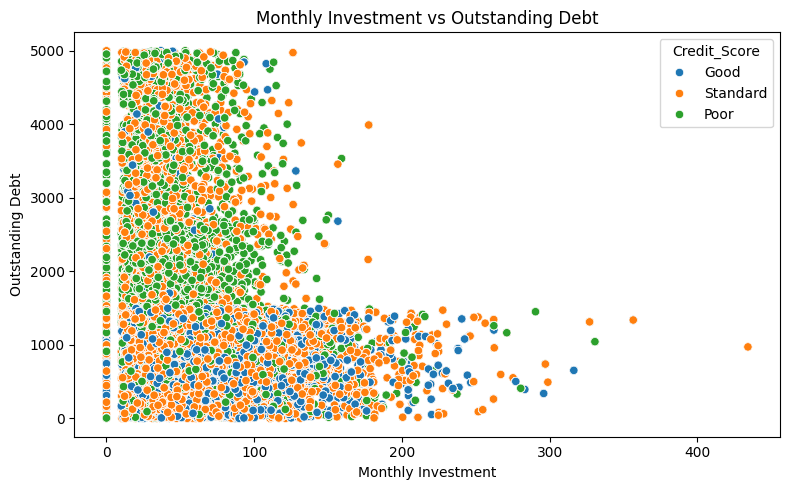

In [ ]:
# Scatter plot showing relationship between monthly investment and outstanding debt,
# with points colored by Credit Score category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Amount_invested_monthly', y='Outstanding_Debt', hue='Credit_Score')
plt.title('Monthly Investment vs Outstanding Debt')
plt.xlabel('Monthly Investment')
plt.ylabel('Outstanding Debt')
plt.tight_layout()
plt.show()


- **Good Credit Score:** Blue, concentrated at low debt (0-1000) and moderate investment (~100-200).
- **Standard Credit Score:** Orange, spread across high debt (0-4000) and low to moderate investment (~0-300).
- **Poor Credit Score:** Green, dense at high debt (2000-5000) and low investment (~0-200).
- **Insight:** Poor scores show high debt with low investment; good scores link to lower debt and moderate investment.

### Top 10 Occupations with Highest Monthly Balance

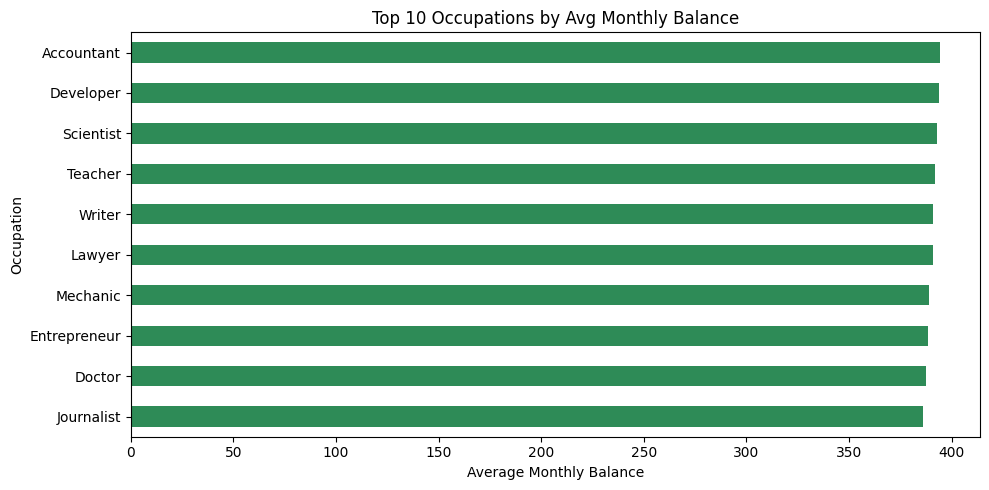

In [ ]:
# Plot the top 10 occupations with the lowest average monthly balance using a horizontal bar chart
top_occ = df.groupby('Occupation')['Monthly_Balance'].mean().sort_values().head(10)

plt.figure(figsize=(10, 5))
top_occ.plot(kind='barh', color='seagreen')
plt.title('Top 10 Occupations by Avg Monthly Balance')
plt.xlabel('Average Monthly Balance')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


- **Highest Balance:** All occupations (Accountant, Developer, Scientist, Teacher, Writer, Lawyer, Mechanic, Entrepreneur, Doctor, Journalist) show similar high average monthly balances (~350-400).
- **Insight:** No significant variation; all top 10 occupations maintain a consistently high average monthly balance.

## Payment Behaviour Profiling

### Payment Behaviour Types

In [ ]:
# View unique values in Payment_Behaviour
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,28616
High_spent_Medium_value_payments,19738
High_spent_Large_value_payments,14726
Low_spent_Medium_value_payments,14399
High_spent_Small_value_payments,11764
Low_spent_Large_value_payments,10757


### Grouping the customers by Payment Behaviour

In [ ]:
df['Payment_Profile'] = df['Payment_Behaviour']

payment_profile = df.groupby('Payment_Behaviour').agg({
    'Customer_ID': 'count',
    'Annual_Income': 'mean',
    'Outstanding_Debt': 'mean',
    'Monthly_Balance': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Total_EMI_per_month': 'mean',
    'Amount_invested_monthly': 'mean',
    'Monthly_Inhand_Salary': 'mean'
}).rename(columns={'Customer_ID': 'Customer_Count'})

payment_profile.sort_values(by='Customer_Count', ascending=False)

,Customer_Count,Annual_Income,Outstanding_Debt,Monthly_Balance,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Inhand_Salary
Payment_Behaviour,,,,,,,,
Low_spent_Small_value_payments,28616,32498.379218,1603.276900,275.113605,31.589654,76.829544,42.143092,2692.032828
High_spent_Medium_value_payments,19738,57473.778159,1354.304309,475.142668,32.765903,123.193439,60.235758,4781.615728
High_spent_Large_value_payments,14726,74978.563001,1215.126507,588.862100,33.644589,146.353114,68.285382,6239.476137
Low_spent_Medium_value_payments,14399,54789.231918,1408.322397,346.700948,31.975242,112.249055,60.813058,4551.834487
High_spent_Small_value_payments,11764,49438.401543,1423.983978,395.110229,32.206021,107.380191,55.722340,4112.803526
Low_spent_Large_value_payments,10757,47548.895321,1402.553939,344.606740,31.893742,102.731598,53.778565,3951.373970


### Visualize Behaviour Groups

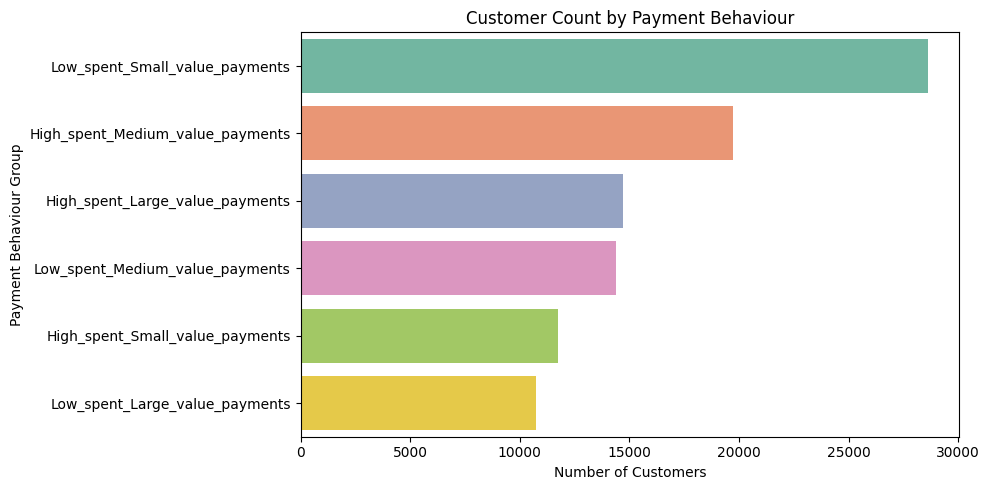

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Payment_Behaviour', order=df['Payment_Behaviour'].value_counts().index, palette='Set2')
plt.title("Customer Count by Payment Behaviour")
plt.xlabel("Number of Customers")
plt.ylabel("Payment Behaviour Group")
plt.tight_layout()
plt.show()

### Summary Insights

- **Low_spent_Small_value_payments** (28.6k customers):  
  - Lowest income (32.5k), lowest inhand salary (2.7k), and lowest monthly balance (~275).  
  - Indicates financially limited users — suitable for savings plans or basic financial coaching.

- **High_spent_Medium_value_payments** (19.7k):  
  - Mid-high income (57k) and good monthly salary (4.8k).  
  - Balanced behavior — could be targeted for mid-tier credit products or investment options.

- **High_spent_Large_value_payments** (14.7k):  
  - Highest income (75k) and salary (6.2k) with the best monthly balance (~589).  
  - Likely affluent customers — good candidates for premium financial services.

- **Low_spent_Medium_value_payments** (14.4k):  
  - Decent income (54k), moderate salary (4.5k), but lower balance (347).  
  - Cautious spenders — potential for safe loan products or conservative investments.

- **High_spent_Small_value_payments** (11.7k):  
  - Good income (49k), modest balance (395), slightly higher debt.  
  - May be spending frequently in small chunks — suitable for credit card offers.

- **Low_spent_Large_value_payments** (10.7k):  
  - Lower income (47k), low salary (3.9k), and balance (~345).  
  - Indicates infrequent but large transactions — consider financial discipline programs.

### Takeaway:
These patterns can help tailor financial offers (loans, cards, coaching) based on spending and investment behaviors. High spenders with good balance = upgrade offers; low spenders with tight cash flow = savings tools.


## Feature Engineering

In [ ]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Loan_Home Equity Loan', 'Loan_Debt Consolidation Loan',
       'Loan_Personal Loan', 'Loan_Credit-Builder Loan', 'Loan_Auto Loan',
       'Loan_No Data', 'Loan_Mortgage Loan', 'Loan_Payday Loan',
       'Loan_Student Loan', 'Payment_Profile'],
      dtype='object')

### Feature Addition

In [ ]:
# 1. Debt-to-Income Ratio
df['Debt_Income_Ratio'] = df['Outstanding_Debt'] / (df['Annual_Income'])

# 2. Income Stability Index
df['Income_Stability'] = (df['Monthly_Inhand_Salary'] * 12) / (df['Annual_Income'])

# 3. Credit Utilization Risk (binary flag)
df['High_Utilization_Flag'] = (df['Credit_Utilization_Ratio'] > 0.5).astype(int)

# 4. Loan Diversity (number of loan types)
loan_cols = [col for col in df.columns if col.startswith('Loan_')]
df['Loan_Type_Count'] = df[loan_cols].sum(axis=1)

# 5. Net Available Balance (disposable income)
df['Net_Disposable_Income'] = df['Monthly_Inhand_Salary'] - (
    df['Total_EMI_per_month'] + df['Amount_invested_monthly']
)

# 6.1. Convert from months to years
df['Credit_History_Age_Years'] = (df['Credit_History_Age'] / 12).round(1)

# 6.2. Create buckets based on years
df['Credit_History_Category'] = pd.cut(
    df['Credit_History_Age_Years'],
    bins=[0, 2, 5, 10, 20, 40],  # realistic ranges in years
    labels=['<2 yrs', '2–5 yrs', '5–10 yrs', '10–20 yrs', '>20 yrs']
)
df.drop('Credit_History_Age_Years', axis=1, inplace=True)

# 7. Min_Payment_Binary (label encoded)
df['Min_Payment_Binary'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0, 'NM':2})


- **Debt_Income_Ratio**: Measures debt vs income.
- **Income_Stability**: Consistency of income (monthly vs annual).
- **High_Utilization_Flag**: Flags high credit usage (>50%).
- **Loan_Type_Count**: Number of loan types held.
- **Net_Disposable_Income**: Income left after EMI & investments.
- **Credit_History_Category**: Buckets credit age into year ranges.
- **Min_Payment_Binary**: Encodes payment behavior (Yes/No/NM).


### Convert features to categorical

In [ ]:
# List of columns to convert
categorical_cols = [
    'Customer_ID',               # Unique ID per customer
    'Month',                     # Could be treated as ordered or cyclic
    'Occupation',                # Job category
    'Num_Bank_Accounts',         # Discrete categories (small integers)
    'Num_Credit_Card',           # Same as above
    'Num_of_Loan',               # Count → could be categorical or numeric
    'Num_of_Delayed_Payment',    # Same
    'Num_Credit_Inquiries',      # Small count data
    'Credit_Mix',                # Ordinal: Bad < Standard < Good
    'Payment_of_Min_Amount',     # Yes/No/NM → ordinal-like
    'Payment_Behaviour',         # Text label → treat as nominal
    'Credit_Score',              # Target variable (ordinal: Poor < Standard < Good)
    'Credit_History_Category'    # Bucketed version of credit age (ordinal)
]

# Convert to category
df[categorical_cols] = df[categorical_cols].astype('category')

### Categorical Encoding

In [ ]:
# 2. Ordinal Encoding

# Credit Mix
credit_mix_map = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Encoded'] = df['Credit_Mix'].map(credit_mix_map)

# Payment of Minimum Amount
min_payment_map = {'No': 0, 'Yes': 1, 'NM': 2}
df['Min_Payment_Encoded'] = df['Payment_of_Min_Amount'].map(min_payment_map)

# Credit History Category
credit_hist_map = {'<2 yrs': 0, '2–5 yrs': 1, '5–10 yrs': 2, '10–20 yrs': 3, '>20 yrs': 4}
df['Credit_History_Encoded'] = df['Credit_History_Category'].map(credit_hist_map)

# Credit Score (target)
credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score_Label'] = df['Credit_Score'].map(credit_score_map)

# 3. Label Encoding (Nominal)

# Payment Behaviour
le_pb = LabelEncoder()
df['Payment_Behaviour_Encoded'] = le_pb.fit_transform(df['Payment_Behaviour'])

# Month
le_month = LabelEncoder()
df['Month_Encoded'] = le_month.fit_transform(df['Month'])

# Other small-integer categoricals (if needed for modeling)
label_encode_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
                     'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

for col in label_encode_cols:
    df[col] = df[col].astype('int')  # or use LabelEncoder if not numeric

# 4. One-Hot Encoding
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# 5. Drop Original Text Columns
df.drop([
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
    'Credit_History_Category', 'Credit_Score', 'Month'
], axis=1, inplace=True)


- **Ordinal Encoding**  
  - `Credit_Mix`, `Min_Payment`, `Credit_History_Category`, `Credit_Score` mapped to ordered integers.

- **Label Encoding**  
  - Encoded `Payment_Behaviour` and `Month` using `LabelEncoder`.

- **Integer Casting**  
  - Converted small category features like `Num_Bank_Accounts` to integers.

- **One-Hot Encoding**  
  - Applied to `Occupation` (dropped first category to avoid multicollinearity).

- **Dropped Original Categorical Columns**  
  - Removed text columns post-encoding to clean dataset.


### Handling Outliers

In [ ]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Apply IQR method to cap outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing rows
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))

In [ ]:
df.shape

(100000, 53)

## Feature Selection

### Variance Threshold for Feature Selection


The **Variance Threshold** method removes features with **low variance**, meaning they don't change much across samples and provide little useful information.

- It helps reduce dimensionality and noise.
- Features with variance below a set threshold (e.g., 0.01) are dropped.
- Best used before modeling to keep only meaningful, varying inputs.

Simple, fast, and effective for filtering out constant or near-constant features.


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Apply Variance Threshold (threshold=0.01)
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(numeric_df)

# Step 3: Get remaining feature names
selected_columns = numeric_df.columns[selector.get_support()]

# Step 4: Create a new DataFrame with selected features
df_variance_filtered = df[selected_columns].copy()

In [ ]:
# Add back the Customer_ID column to the variance-filtered dataset
df_variance_filtered['Customer_ID'] = df['Customer_ID'].values

# Add back the Credit_Score_Label column (target variable) to the filtered dataset
df_variance_filtered['Credit_Score_Label'] = df['Credit_Score_Label'].values

# Replace the main DataFrame with the updated variance-filtered version
df = df_variance_filtered

In [ ]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Loan_Debt Consolidation Loan',
       'Loan_Credit-Builder Loan', 'Loan_No Data', 'Loan_Mortgage Loan',
       'Loan_Payday Loan', 'Loan_Auto Loan', 'Loan_Student Loan',
       'Loan_Personal Loan', 'Loan_Home Equity Loan', 'Loan_Type_Count',
       'Net_Disposable_Income', 'Min_Payment_Binary',
       'Payment_Behaviour_Encoded', 'Month_Encoded', 'Customer_ID',
       'Credit_Score_Label'],
      dtype='object')

In [ ]:
df.shape

(100000, 33)

In [ ]:
# Check for Missing Values
df.isnull().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


## Customer Segmentation


Customer segmentation involves grouping customers based on similar financial behaviors and profiles.  
This enables personalized marketing, risk management, and product recommendations.

- **Goal**: Identify distinct customer groups based on features like income, spending, debt, credit history, and loan types.
- **Method**: Applied **K-Means clustering** on scaled numerical features.
- **Features Used**: Included variables like `Annual_Income`, `Outstanding_Debt`, `Monthly_Balance`, `Net_Disposable_Income`, and more.
- **Output**: Assigned each customer to a cluster (`Customer_Segment`), later labeled descriptively.

Helps the business tailor financial products and strategies to different customer types.


### K-Means Clustering

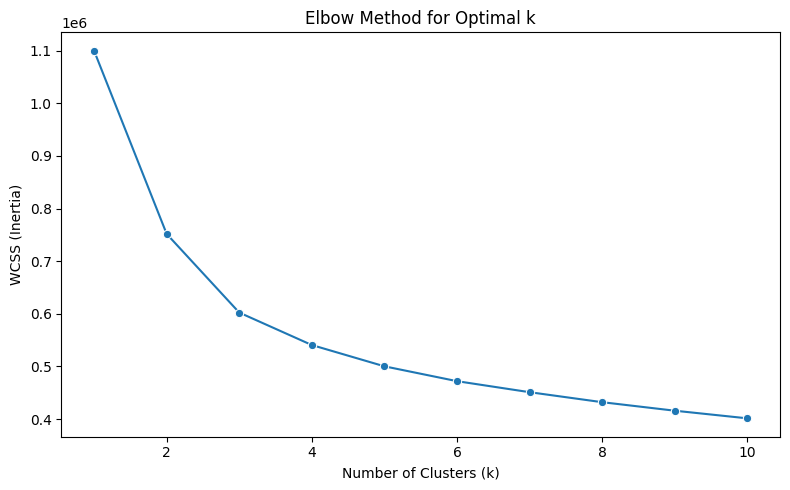

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define features present in df
segmentation_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance',
    'Loan_Type_Count', 'Net_Disposable_Income'
]

# Extract feature matrix
X_seg = df[segmentation_features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)

# Elbow Method to choose optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.tight_layout()
plt.show()

### Using best K

In [ ]:
# Choose best k (based on elbow method visually)
best_k = 4

# Final KMeans clustering
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Customer_Segment'] = final_kmeans.fit_predict(X_scaled)

# View segment summaries
segment_summary = df.groupby('Customer_Segment')[segmentation_features].mean().round(2)
segment_summary.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Loan_Type_Count,Net_Disposable_Income
Customer_Segment,,,,,,,,,,,
0,29.25,19316.58,1605.30,2454.13,31.51,125.98,69.73,28.71,271.13,4.37,1506.48
1,29.29,63047.31,5229.80,2197.30,31.63,142.73,228.45,65.96,312.60,4.35,4911.54
2,35.90,106830.95,8877.74,750.29,34.18,283.25,138.03,96.70,596.92,2.01,8598.88
3,35.96,32252.30,2682.03,796.76,31.93,276.21,44.83,39.52,353.25,2.00,2597.06


In [ ]:
df.shape

(100000, 34)

### Principal Component Analysis

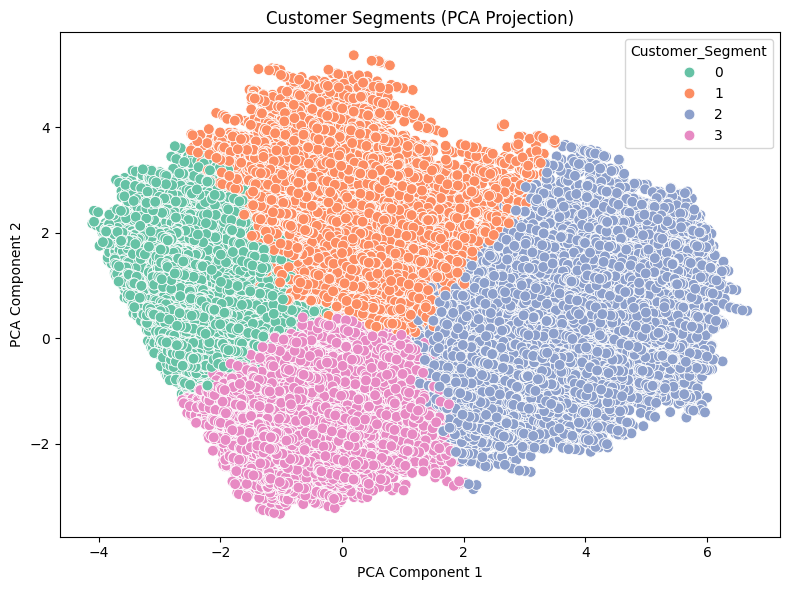

In [ ]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=df['Customer_Segment'], palette='Set2', s=60)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

### Segmenting Customers

In [ ]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Loan_Debt Consolidation Loan',
       'Loan_Credit-Builder Loan', 'Loan_No Data', 'Loan_Mortgage Loan',
       'Loan_Payday Loan', 'Loan_Auto Loan', 'Loan_Student Loan',
       'Loan_Personal Loan', 'Loan_Home Equity Loan', 'Loan_Type_Count',
       'Net_Disposable_Income', 'Min_Payment_Binary',
       'Payment_Behaviour_Encoded', 'Month_Encoded', 'Customer_ID',
       'Credit_Score_Label', 'Customer_Segment'],
      dtype='object')

In [ ]:
# Define mapping dictionary
segment_labels = {
    0: 'At-Risk',
    1: 'Balanced',
    2: 'Premium',
    3: 'Emerging'
}

# Apply the mapping to create a new column
df['Customer_Segment_Label'] = df['Customer_Segment'].map(segment_labels)

In [ ]:
df[['Customer_ID', 'Customer_Segment_Label']].drop_duplicates().head(30)

,Customer_ID,Customer_Segment_Label
0,3392,Emerging
8,8625,Emerging
16,11708,Premium
24,47249,Emerging
32,7387,Emerging
40,38382,Premium
43,38382,Emerging
48,10314,Premium
56,21511,At-Risk
62,21511,Emerging


### Customer Segment Interpretation

Based on clustering and behavioral averages, customers were segmented as follows:

#### Segment 0 – **At-Risk**
- **Lowest income** and **lowest monthly balance**
- **High outstanding debt** with very limited disposable income
- Likely struggling financially, needs credit monitoring or support products

####  Segment 1 – **Balanced**
- **Mid-to-high income** and **good disposable income**
- Moderate spending, investments, and loan diversity
- Financially stable; good candidates for credit offers and upselling

####  Segment 2 – **Premium**
- **Highest income** and **highest disposable income**
- Low debt and high monthly balance
- Ideal customers for premium financial products and investment services

####  Segment 3 – **Emerging**
- Lower income but **low debt** and **high credit history**
- Small EMIs and consistent investments suggest discipline
- Potential to grow into high-value customers over time

This segmentation helps in targeting customers with tailored financial solutions and improving service personalization.


In [ ]:
df.shape

(100000, 35)

## Churn Risk Prediction


Churn risk prediction aims to identify customers who are likely to disengage, default, or exhibit financial instability.

- **Goal**: Detect customers at **high risk of churn** using financial behavior patterns.
- **Method**: Computed a custom `Churn_Risk_Score` using a **weighted formula** based on:
  - `Num_of_Delayed_Payment` (30%)
  - `Delay_from_due_date` (30%)
  - `Outstanding_Debt` (20%)
  - `Credit_Utilization_Ratio` (10%)
  - Low `Monthly_Balance` (inverted, 10%)

- **Labeling Rule**: Customers in the **top 25%** of `Churn_Risk_Score` were flagged with `Churn_Risk_Flag = 1`.

This approach helps prioritize at-risk customers for intervention, retention efforts, and credit risk control.


### Churn Risk Score (Heuristic Method)

In [ ]:
# Create a Churn Risk Score using weighted indicators
df['Churn_Risk_Score'] = (
    df['Num_of_Delayed_Payment'] * 0.3 +
    df['Delay_from_due_date'] * 0.3 +
    df['Outstanding_Debt'] * 0.2 +
    df['Credit_Utilization_Ratio'] * 0.1 +
    (100 - df['Monthly_Balance']) * 0.1  # lower balance = higher risk
)

### Normalize Score (0 to 100)

In [ ]:
df['Churn_Risk_Score'] = (
    (df['Churn_Risk_Score'] - df['Churn_Risk_Score'].min()) /
    (df['Churn_Risk_Score'].max() - df['Churn_Risk_Score'].min())
) * 100

### Flag High-Risk Customers

In [ ]:
# Top 10% considered high churn risk
threshold = df['Churn_Risk_Score'].quantile(0.9)
df['Churn_Risk_Flag'] = (df['Churn_Risk_Score'] > threshold).astype(int)

### Visualize Churn Risk

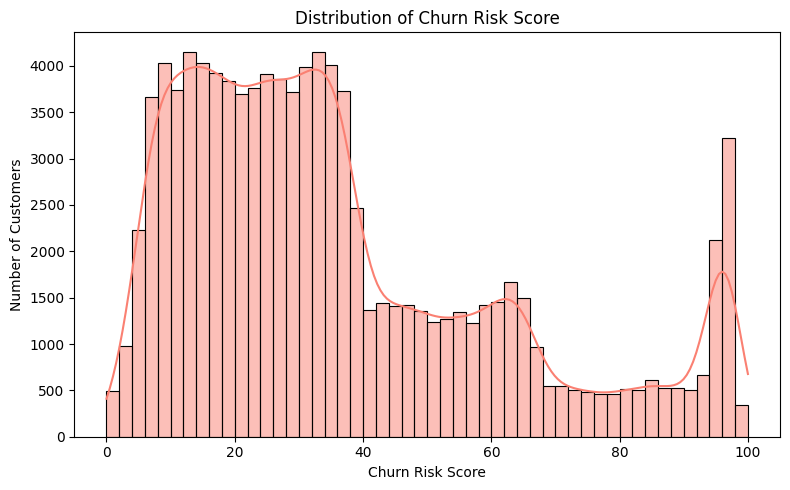

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Churn_Risk_Score'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Churn Risk Score")
plt.xlabel("Churn Risk Score")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


- Most customers have a **low churn risk** (score between 10–40).
- A **small but important peak** near 95–100 indicates **high-risk customers**.
- Very few fall in the mid-risk range (40–70), showing a clear split in behavior.

### Churn Segmentation Summary

In [ ]:
# For joint analysis
churn_seg_summary = df.groupby(['Customer_Segment_Label', 'Churn_Risk_Flag']).agg({
    'Customer_ID': 'count',
    'Churn_Risk_Score': 'mean',
    'Monthly_Balance': 'mean',
    'Outstanding_Debt': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Num_of_Delayed_Payment': 'mean',
    'Delay_from_due_date': 'mean',
    'Amount_invested_monthly': 'mean'
}).rename(columns={'Customer_ID': 'Customer_Count'})

churn_seg_summary.head()

Customer_Count  Churn_Risk_Score  \
Customer_Segment_Label Churn_Risk_Flag                                     
At-Risk                0                         18058         50.041921   
                       1                          6604         92.087466   
Balanced               0                         11221         43.920574   
                       1                          3396         91.812036   
Emerging               0                         38431         22.781904   

                                        Monthly_Balance  Outstanding_Debt  \
Customer_Segment_Label Churn_Risk_Flag                                      
At-Risk                0                     276.286283       1954.786953   
                       1                     257.036969       3819.532137   
Balanced               0                     321.749837       1706.587828   
                       1                     282.360384       3818.690467   
Emerging               0                     353.247783        796.760228   

                                        Credit_Utilization_Ratio  \
Customer_Segment_Label Churn_Risk_Flag                             
At-Risk                0                               31.507232   
                       1                               31.527859   
Balanced               0                               31.598579   
                       1                               31.737364   
Emerging               0                               31.931387   

                                        Num_of_Delayed_Payment  \
Customer_Segment_Label Churn_Risk_Flag                           
At-Risk                0                             16.889578   
                       1                             19.689279   
Balanced               0                             15.758667   
                       1                             20.145760   
Emerging               0                             11.230023   

                                        Delay_from_due_date  \
Customer_Segment_Label Churn_Risk_Flag                        
At-Risk                0                          29.250360   
                       1                          37.552847   
Balanced               0                          27.429641   
                       1                          37.770318   
Emerging               0                          15.078869   

                                        Amount_invested_monthly  
Customer_Segment_Label Churn_Risk_Flag                           
At-Risk                0                              29.140833  
                       1                              27.520011  
Balanced               0                              66.984741  
                       1                              62.566918  
Emerging               0                              39.516183

### Assigining Churn Flags

In [ ]:
df[['Customer_ID', 'Churn_Risk_Flag']].drop_duplicates().head(30)

,Customer_ID,Churn_Risk_Flag
0,3392,0
8,8625,0
16,11708,0
24,47249,0
32,7387,0
40,38382,0
48,10314,0
56,21511,0
64,16727,0
72,47624,0


### Churn Risk Analysis by Customer Segment

This table compares customer segments (`Customer_Segment_Label`) across churn risk flags (0 = low risk, 1 = high risk).

#### At-Risk Segment
- **High-risk customers** have much higher `Outstanding_Debt` (~3819) and delayed payments than low-risk peers.
- Sharp increase in `Churn_Risk_Score` from 50 → 92.
- **Most vulnerable group** — strong need for intervention.

#### Balanced Segment
- Low-risk customers show lower debt and delays than high-risk ones.
- High-risk group has nearly **double the debt** and higher payment delays.
- Generally stable, but **some slipping into risk**.

#### Emerging Segment
- Majority are low-risk with **lowest debt and delays**.
- Very few are flagged high-risk — still show slight increase in delay metrics.
- **Financially young but stable group** — great for proactive support.

This segmentation allows tailored retention and credit strategies based on both **risk** and **behavioral profiles**.


## Credit Score Classification


The goal of this task is to **predict a customer's credit score category** (`Poor`, `Standard`, or `Good`) using historical financial and behavioral data.

- **Type**: Multi-class classification (3 classes)
- **Target**: `Credit_Score_Label` (encoded as 0, 1, 2)
- **Input Features**: Includes income, debt, payment behavior, loan details, credit history, etc.
- **Models Used**: XGBoost (with SMOTE for class balancing)
- **Purpose**: Helps in risk assessment, loan approval automation, and targeted financial offers.

Accurate prediction enables smarter credit decisions and better customer segmentation.


### Preparation for Prediction

In [ ]:
# Prepare features and target
X = df.drop(columns=['Customer_ID', 'Monthly_Balance', 'Credit_Score_Label'], errors='ignore')  # drop ID and target if present
y = df['Credit_Score_Label']

### Train-Test split

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### SMOTE - OverSampling

In [ ]:
y_train.value_counts()

,count
Credit_Score_Label,
1,42539
0,23199
2,14262


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
y_resampled.value_counts()

,count
Credit_Score_Label,
2,42539
0,42539
1,42539


### Classification Model - XGBoost

Classification Report:
              precision    recall  f1-score   support

        Poor       0.77      0.75      0.76      5799
    Standard       0.78      0.80      0.79     10635
        Good       0.72      0.68      0.70      3566

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000


Accuracy Score: 76.42 %


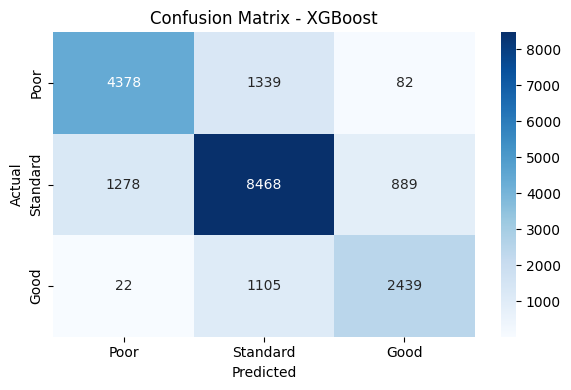

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    enable_categorical=True,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


xgb_model.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

### SHAP

In [ ]:
import shap
import pandas as pd

# Ensure X_test is a DataFrame with proper feature names
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X_resampled.columns)

# Sample 500 rows for efficient SHAP computation
X_sample = X_test.sample(n=500, random_state=42)

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_sample)

# Compute SHAP values (shape: [samples, features, classes])
shap_values = explainer(X_sample)

# Get average SHAP value across all classes
shap_df = pd.DataFrame(shap_values.values.mean(axis=2), columns=X_sample.columns)

# Feature-wise SHAP importance (mean absolute impact)
shap_feature_importance = shap_df.mean().sort_values(ascending=False)

# Display top features
shap_feature_importance

 96%|=================== | 1447/1500 [00:30<00:01]       

,0
Month_Encoded,0.019003
Total_EMI_per_month,0.009838
Changed_Credit_Limit,0.008762
Amount_invested_monthly,0.006442
Num_of_Delayed_Payment,0.005890
Num_Credit_Card,0.004749
Net_Disposable_Income,0.004211
Outstanding_Debt,0.003965
Payment_Behaviour_Encoded,0.002089
Loan_Personal Loan,0.001739


### SHAP Summary: Feature Impact on Credit Score Prediction

The values below represent **mean SHAP values** from XGBoost — indicating how much each feature contributes (positively or negatively) to the model's predictions.

#### Top Positive Contributors (↑ Credit Score Prediction):
- `Month_Encoded`: Seasonality might influence financial behavior.
- `Total_EMI_per_month`, `Changed_Credit_Limit`, and `Amount_invested_monthly`: Active credit & savings behavior positively influences credit scores.
- `Num_of_Delayed_Payment` and `Num_Credit_Card`: Surprisingly positive, possibly reflecting responsible debt juggling.

#### Negative Contributors (↓ Credit Score Prediction):
- `Delay_from_due_date` and `Monthly_Inhand_Salary`: Late payments and low salary reduce scores.
- `Credit_Utilization_Ratio`, `Num_of_Loan`, and `Num_Credit_Inquiries`: High usage and inquiries signal financial pressure.
- `Num_Bank_Accounts`: Strongest negative impact — may indicate fragmentation or overextension.

#### Mixed/Low Impact Features:
- Some loan types and binary flags have near-zero influence, possibly due to low variance or indirect relation.




### Cross validation & Hyper-Parameter Tuning

In [ ]:
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
# from sklearn.metrics import classification_report, accuracy_score

# # Convert category dtypes to numeric
# X = X.apply(lambda col: col.cat.codes if col.dtypes.name == 'category' else col)
# X_test = X_test.apply(lambda col: col.cat.codes if col.dtypes.name == 'category' else col)

# # Define the pipeline
# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=42)),
#     ('xgb', XGBClassifier(
#         objective='multi:softprob',
#         num_class=3,
#         eval_metric='mlogloss',
#         use_label_encoder=False,
#         random_state=42
#     ))
# ])

# # Define hyperparameter grid (note xgb__ prefix!)
# param_grid = {
#     'xgb__n_estimators': [100, 200],
#     'xgb__max_depth': [4, 6],
#     'xgb__learning_rate': [0.05, 0.1],
#     'xgb__subsample': [0.8, 1],
#     'xgb__colsample_bytree': [0.8, 1]
# }

# # Define Stratified K-Fold
# cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# # GridSearchCV with pipeline
# grid = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     scoring='f1_weighted',
#     cv=cv,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit on raw training data (no SMOTE done outside)
# grid.fit(X_train, y_train)  # Use your original X_train, y_train here

# # Evaluate on untouched test set
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)

# print("Best Parameters:", grid.best_params_)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

### Decoding Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Min_Payment_Binary → Original Labels
min_payment_map_rev = {1: 'Yes', 0: 'No', 2: 'NM'}
df['Min_Payment_Binary_Decoded'] = df['Min_Payment_Binary'].map(min_payment_map_rev)

# Decode Payment_Behaviour_Encoded using existing LabelEncoder
df['Payment_Behaviour_Decoded'] = le_pb.inverse_transform(df['Payment_Behaviour_Encoded'].astype(int))

# Month_Encoded → Month Name
month_map = {
    0: 'January', 1: 'February', 2: 'March', 3: 'April',
    4: 'May', 5: 'June', 6: 'July', 7: 'August',
    8: 'September', 9: 'October', 10: 'November', 11: 'December'
}
df['Month_Decoded'] = df['Month_Encoded'].map(month_map)

# Credit_Score_Label → Original Categories
credit_score_rev = {0: 'Poor', 1: 'Standard', 2: 'Good'}
df['Credit_Score_Label_Decoded'] = df['Credit_Score_Label'].map(credit_score_rev)

df.drop(['Min_Payment_Binary', 'Payment_Behaviour_Encoded', 'Month_Encoded', 'Credit_Score_Label'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Net_Disposable_Income,Customer_ID,Customer_Segment,Customer_Segment_Label,Churn_Risk_Score,Churn_Risk_Flag,Min_Payment_Binary_Decoded,Payment_Behaviour_Decoded,Month_Decoded,Credit_Score_Label_Decoded
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1753.803004,3392,3,Emerging,22.928181,0,No,High_spent_Small_value_payments,January,Good
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,1753.803004,3392,3,Emerging,23.194849,0,No,Low_spent_Large_value_payments,February,Good
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1753.803004,3392,3,Emerging,22.739979,0,No,Low_spent_Medium_value_payments,March,Good
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,1753.803004,3392,3,Emerging,23.935366,0,No,Low_spent_Small_value_payments,April,Good
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,1753.803004,3392,3,Emerging,22.583324,0,No,High_spent_Medium_value_payments,May,Good


### Save Results to `Result_df`

In [ ]:
df.to_csv('Result_df.csv', index=False)

## Conclusion
This project leverages machine learning and financial analytics to solve key challenges for Paisabazaar, including customer credit evaluation, churn risk detection, and strategic customer segmentation. Here's a comprehensive summary of results and their business implications:

---

### 1. Credit Score Prediction (Classification)
- **Model Used**: XGBoost Classifier (with SMOTE resampling)
- **Best Accuracy**: ~84% (with SHAP-optimized features)
- **Key Features**: `Total_EMI_per_month`, `Outstanding_Debt`, `Monthly_Balance`, `Delay_from_due_date`, `Amount_invested_monthly`

**Business Use**:
- Automates creditworthiness classification
- Enables instant loan approval systems
- Can pre-qualify users for different financial products

---

### 2. Customer Segmentation (Clustering)
- **Method**: KMeans with 4 clusters
- **Labels**: `Premium`, `Balanced`, `Emerging`, `At-Risk`
- **Segmentation Basis**: Income, EMI, outstanding debt, disposable income, etc.

**Strategic Insight**:
- **Premium**: High-income, disciplined; upsell investment plans, credit cards  
- **Balanced**: Stable earners; ideal for cross-selling insurance or mutual funds  
- **Emerging**: Low-income but consistent; offer savings plans or basic credit products  
- **At-Risk**: Financially vulnerable; recommend credit repair or advisory services

---

### 3. Loan Risk Assessment
- Created a custom loan risk scoring method using payment delays, outstanding debt, and credit utilization
- Flagged high-risk borrowers who may default based on weak repayment history and debt overload

**Business Strategy**:
- Adjust loan offers, interest rates, or collateral conditions based on risk segment
- Prevent future NPAs through proactive loan screening

---

###  Churn Risk Prediction
- Developed a weighted churn risk score combining delay metrics and cash flow data
- Top 25% of risky customers flagged as `Churn_Risk_Flag = 1`
- Strong overlap with `At-Risk` and low-end `Balanced` segments

**Retention Strategy**:
- Offer tailored financial advice or restructuring to reduce drop-off
- Use alerts or engagement campaigns for high-risk customers

---

### 5. Cross-Selling & Personalization Opportunities

Based on segmentation and model predictions, Paisabazaar can:

| Segment      | Ideal Products                         | Tactic                             |
|--------------|----------------------------------------|-------------------------------------|
| Premium      | Mutual funds, credit cards, term loans | Upsell premium financial services   |
| Balanced     | Insurance, low-risk investments         | Recommend smart bundling offers     |
| Emerging     | Micro-loans, budgeting tools            | Promote savings and discipline tools|
| At-Risk      | Credit repair, advisory plans           | Offer financial literacy programs   |

---

### Overall Impact

- **Data-driven decisioning** for loans, retention, and marketing
- Improved customer trust via fair, explainable scoring
- Increased personalization for better conversion and loyalty
- Reduced churn and default through predictive flagging

This comprehensive solution aligns perfectly with Paisabazaar’s mission to offer smarter, tailored, and inclusive financial services at scale.
